In [8]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip3 install spotipy
import pandas as pd
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("/content/drive/MyDrive/Work/ML-Project/data/top200.csv")
df.head(50)

,Unnamed: 0,id,album,artist_x,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,title,rank,date,artist_y,region,chart,trend,streams
0,5917,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,76,0.720,0.763,9.0,-4.068,0.0,0.0523,0.40600,0.000000,0.1800,0.7420,101.965,audio_features,4.184800,4.0,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Ireland,top200,SAME_POSITION,24914.0
1,10763,5aAx2yezTd8zXrkmtKl66Z,Starboy,"The Weeknd, Daft Punk",True,0,0.681,0.594,7.0,-7.028,1.0,0.2820,0.16500,0.000003,0.1340,0.5350,186.054,audio_features,3.840883,4.0,Starboy,2,2017-01-01,"The Weeknd, Daft Punk",Ireland,top200,SAME_POSITION,20407.0
2,8217,5uCax9HTNlzGybIStD3vDh,Back from the Edge,James Arthur,False,85,0.358,0.557,10.0,-7.398,1.0,0.0590,0.69500,0.000000,0.0902,0.4940,85.043,audio_features,3.524450,4.0,Say You Won't Let Go,3,2017-01-01,James Arthur,Ireland,top200,MOVE_UP,18749.0
3,12635,3AsAuGTaDQzavZZThyYlop,Sexual,"NEIKED, Dyo",False,0,0.803,0.569,2.0,-7.392,1.0,0.0739,0.06230,0.000000,0.0830,0.8090,107.986,audio_features,3.148150,4.0,Sexual,4,2017-01-01,"NEIKED, Dyo",Ireland,top200,MOVE_DOWN,18662.0
4,99822,4b4KcovePX8Ke2cLIQTLM0,Night & Day (Night Edition),"The Vamps, Matoma",False,0,0.544,0.809,8.0,-5.098,1.0,0.0363,0.00380,0.000000,0.3230,0.4480,145.017,audio_features,3.294000,4.0,All Night,5,2017-01-01,"The Vamps, Matoma",Ireland,top200,MOVE_DOWN,16781.0
5,11277,7BKLCZ1jbUBVqRi2FVlTVw,Closer,"The Chainsmokers, Halsey",False,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.41400,0.000000,0.1110,0.6610,95.010,audio_features,4.082667,4.0,Closer,6,2017-01-01,"The Chainsmokers, Halsey",Ireland,top200,MOVE_UP,16423.0
6,14463,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,"Maroon 5, Kendrick Lamar",False,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.33800,0.000000,0.0975,0.4470,100.048,audio_features,3.574667,4.0,Don't Wanna Know,7,2017-01-01,"Maroon 5, Kendrick Lamar",Ireland,top200,MOVE_DOWN,16287.0
7,4417,78rIJddV4X0HkNAInEcYde,Call On Me (Remixes),"Starley, Ryan Riback",False,46,0.670,0.838,0.0,-4.031,1.0,0.0362,0.06040,0.000611,0.1590,0.7170,104.998,audio_features,3.700683,4.0,Call On Me - Ryan Riback Extended Remix,8,2017-01-01,Starley,Ireland,top200,SAME_POSITION,15645.0
8,7747,3EmmCZoqpWOTY1g2GBwJoR,Just Hold On,"Steve Aoki, Louis Tomlinson",False,65,0.647,0.932,11.0,-3.515,1.0,0.0824,0.00383,0.000002,0.0574,0.3740,114.991,audio_features,3.312900,4.0,Just Hold On,9,2017-01-01,"Steve Aoki, Louis Tomlinson",Ireland,top200,MOVE_UP,15182.0
9,13407,1xznGGDReH1oQq0xzbwXa3,Views,"Drake, WizKid, Kyla",False,1,0.791,0.619,1.0,-5.886,1.0,0.0532,0.00784,0.004230,0.3510,0.3710,103.989,audio_features,2.899783,4.0,One Dance,10,2017-01-01,"Drake, WizKid, Kyla",Ireland,top200,MOVE_DOWN,14813.0


In [14]:
df.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank,streams
count,352390.000000,352390.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352389.000000,352390.000000,352390.000000
mean,176194.500000,60.654076,0.660016,0.640436,5.263924,-6.360088,0.623113,0.099263,0.230974,0.010399,0.166478,0.495270,119.262010,3.480376,3.958035,100.501657,11129.063359
std,101726.375017,28.810662,0.141395,0.173599,3.633506,2.460253,0.484607,0.095497,0.251422,0.062218,0.123228,0.220667,26.313242,0.681139,0.305542,57.734158,10180.724263
min,0.000000,0.000000,0.072900,0.005430,0.000000,-34.475000,0.000000,0.023200,0.000002,0.000000,0.021500,0.032000,40.319000,0.502217,1.000000,1.000000,2003.000000
25%,88097.250000,57.000000,0.578000,0.528000,1.000000,-7.512000,0.000000,0.039500,0.037200,0.000000,0.092400,0.330000,99.977000,3.054833,4.000000,51.000000,5634.000000
50%,176194.500000,73.000000,0.676000,0.660000,5.000000,-5.969000,1.000000,0.058000,0.135000,0.000000,0.119000,0.490000,118.997000,3.424750,4.000000,101.000000,7357.000000
75%,264291.750000,80.000000,0.755000,0.771000,8.000000,-4.661000,1.000000,0.114000,0.334000,0.000031,0.195000,0.661000,134.935000,3.780633,4.000000,151.000000,12671.000000
max,352389.000000,100.000000,0.975000,0.997000,11.000000,0.175000,1.000000,0.966000,0.994000,0.956000,0.989000,0.982000,210.002000,15.725483,5.000000,200.000000,319678.000000


### EDA

>Enter param:streams


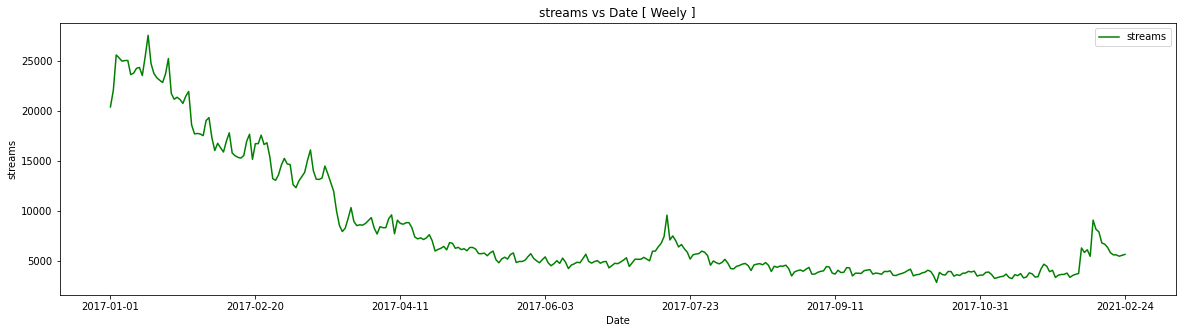

In [50]:
#df[df['title'] == 'Starboy'].popularity

#checking how the acousticness of the top song in top200 varied over the years
param = input(">Enter param:")
#param = "popularity"
var_df = df[df["title"]== "Starboy"]
var_df = var_df[[param, "date"]]
#var_df.date = var_df.date.str[:-3]

#var_df.head()
#var_df = var_df[["date",param]]
#var_df = var_df.drop_duplicates(subset = ["date"], keep = "first")
#var_df.set_index("date",inplace = True )
#var_df = var_df[]

#fetching the top song every week
"""count = 0
for index, row in var_df.iterrows():
    count += 1
    if count % 7 !=0:
        var_df.drop(index, inplace=True)
"""

var_df.head()
#var_df.plot(figsize=(20,5), color = 'green', kind = 'scatter',x='date',y='streams')
var_df.plot(figsize=(20,5), color = 'green',x='date',y=param)
title = param + " vs Date [ Weely ]"
plt.title(title)
plt.xlabel('Date')
plt.ylabel(param)
plt.legend(loc='best')
plt.show()


In [38]:
var_df = df[df["title"]== "Say You Won't Let Go"]
var_df = var_df[["popularity", "date"]]
var_df

,popularity,date
2,85,2017-01-01
202,85,2017-01-02
402,85,2017-01-03
601,85,2017-01-04
802,85,2017-01-05
...,...,...
351336,85,2021-10-26
351530,85,2021-10-27
351742,85,2021-10-28
351972,85,2021-10-29


In [13]:
df['popularity'].unique()

array([ 76,   0,  85,  46,  65,   1,  59,  78,  72,  56,  77,  74,  67,
        75,   2,  70,  23,  61,  42,  58,  80,  73,  71,  81,  55,  47,
        39,  68,  51,  84,  33,  64,  79,  63,  69,  60,  66,  82,   3,
        35,  50,  57,  24,  48,  34,  30,   6,  49,  52,  83,  29,  11,
        62,  43,  25,  37,  53,  21,  86,  45,  40,  41,  44,  54,  32,
        17,  26,   5,  36,  38,  18,  87,  20,   4,   7,  19,  28,  31,
        12,  14,  16,  13,  88,   9,  27,  15,  22,  10,   8,  89,  92,
        90,  91,  94,  93,  95,  98,  96, 100])

In [12]:
counts = df['popularity'].value_counts()
for x in counts:
  print(x)

39935
16364
15195
14377
13433
12498
12498
12111
11835
11728
10346
9574
9104
8654
8616
8469
7936
7272
7254
7020
6712
6498
6484
6077
6014
5388
5049
5044
4576
3317
3002
2946
2850
2623
2620
2608
2416
1891
1789
1664
1583
1520
1492
1434
1366
1363
1330
1239
995
995
957
880
867
803
774
706
697
637
554
514
469
459
443
440
425
411
410
377
367
352
310
266
229
211
210
207
183
181
171
160
158
148
146
141
138
127
122
117
112
110
74
64
56
44
18
15
14
8
4


>Enter param:streams


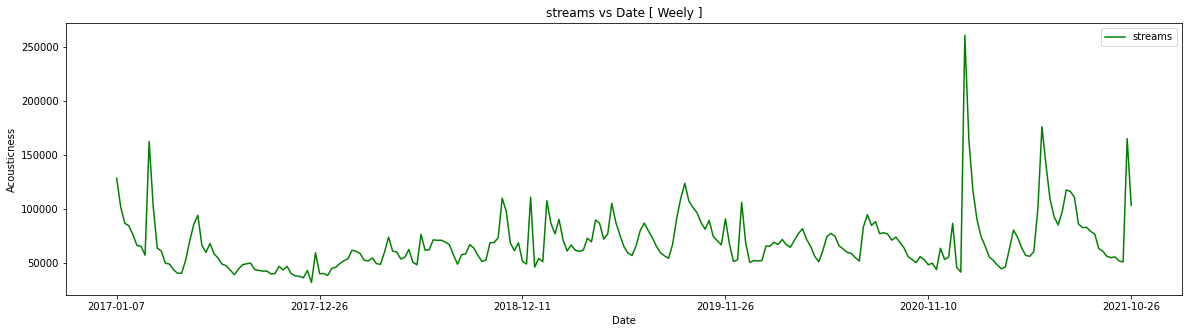

In [51]:
#checking how the acousticness of the top song in top200 varied over the years
param = input(">Enter param:")
var_df = df[df["rank"]==1]
#var_df.date = var_df.date.str[:-3]

#var_df.head()
var_df = var_df[["date",param]]
var_df = var_df.drop_duplicates(subset = ["date"], keep = "first")
var_df.set_index("date",inplace = True )
#var_df = var_df[]

#fetching the top song every week
count = 0
for index, row in var_df.iterrows():
    count += 1
    if count % 7 !=0:
        var_df.drop(index, inplace=True)


var_df.head()
var_df.plot(figsize=(20,5), color = 'green')
title = param + " vs Date [ Weely ]"
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Acousticness')
plt.legend(loc='best')
plt.show()


In [52]:
var_df.isnull().sum()

streams    0
dtype: int64

In [64]:
var_df = var_df[var_df['streams'].notna()]

### ARIMA

In [ ]:
!pip3 install pmdarima
import pmdarima as pm

In [65]:
results = pm.auto_arima(var_df,information_criterion='aic', seasonal_test = 'df',
                        start_p=1,start_q=1, max_p=4, max_q=4,stepwise=True,trace=True,
                        error_action='ignore',suppress_warnings=True)
results

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5759.579, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5747.350, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5734.601, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5757.586, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5706.837, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5705.037, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5705.229, Time=0.27 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5702.663, Time=0.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5704.594, Time=0.32 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=5701.198, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=5702.234, Time=0.13 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=5701.999, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=5

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
len(var_df)

58

train              streams
date                
2017-01-07  128365.0
2017-01-14  101613.0
2017-01-21   86644.0
2017-01-28   84322.0
2017-02-04   76096.0
...              ...
2021-01-26  116738.0
2021-02-02   89991.0
2021-02-09   74293.0
2021-02-16   65489.0
2021-02-23   55399.0

[216 rows x 1 columns]
             streams
date                
2021-03-02   52270.0
2021-03-09   47794.0
2021-03-16   44353.0
2021-03-23   46240.0
2021-03-30   63411.0
2021-04-06   80287.0
2021-04-13   73604.0
2021-04-20   63774.0
2021-04-27   56777.0
2021-05-04   55946.0
2021-05-11   60312.0
2021-05-18  100466.0
2021-05-25  176171.0
2021-06-01  140607.0
2021-06-08  108869.0
2021-06-15   92571.0
2021-06-22   85067.0
2021-06-29   97376.0
2021-07-06  117574.0
2021-07-13  116109.0
2021-07-20  110846.0
2021-07-27   86076.0
2021-08-03   82554.0
2021-08-10   82889.0
2021-08-17   79014.0
2021-08-24   76728.0
2021-08-31   63144.0
2021-09-07   60665.0
2021-09-14   55990.0
2021-09-21   54706.0
2021-09-28   55373.0
2021

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


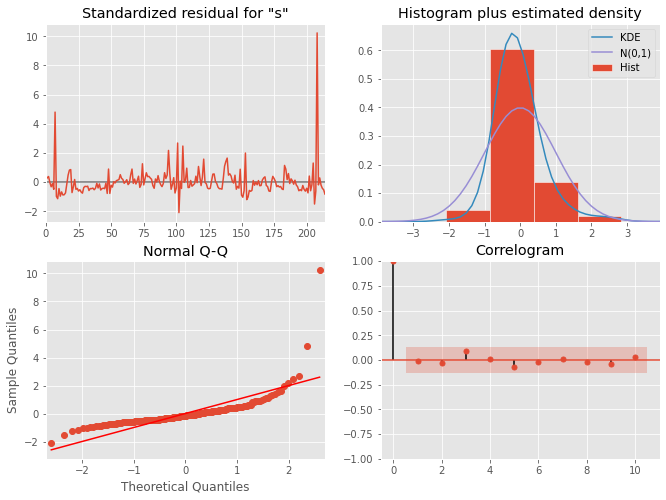

In [66]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
plt.style.use('ggplot')
%matplotlib inline
# The following tools aid in time series analysis:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def train_test(df):
    #Set training data before 2021
    train = df[:'2021-03-01']
    print("train",train)
    #Set test data starting 2021
    test = df['2021-03-01':]
    print(test)
    return train, test
def fit_model(df,pdq,pdqs):
    # Use train_test function
    train, test = train_test(df)
    # Fit the model, give the summary information & diagnostics
    model = SARIMAX(train,order=pdq,seasonal_order=pdqs)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return train, test, results
pdq = (1,1,2)
pdqs = (0,0,0,0)
train, test, results = fit_model(var_df,pdq=pdq,pdqs=pdqs)

22028.263397300732
SARIMA model RMSE on train data: 22028.26340


<Figure size 1080x504 with 0 Axes>

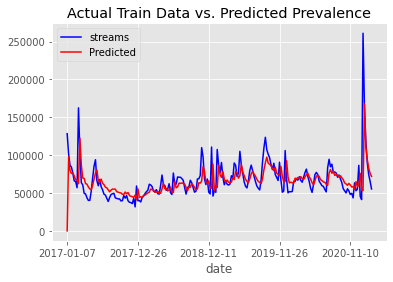

In [67]:
def train_RMSE(train, results, display = True):
    # Validate Training Data on 40 Years of Data
    train_pred = results.predict()
    # Compare Real Training Data to Predicted Data
    rmse = sqrt(MSE(train,train_pred))
    print(rmse)
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(15,7))
        train.plot(label='Actual',color='b')
        train_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Prevalence')
        plt.show()


train_RMSE(train, results)

42192.78748112985
SARIMA model RMSE on train data: 42192.78748


<Figure size 1080x504 with 0 Axes>

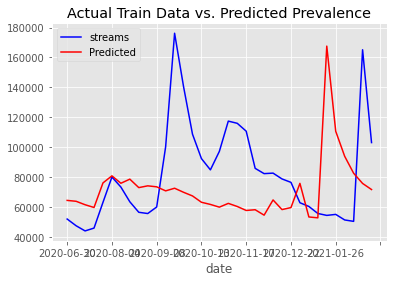

In [83]:
def test_RMSE(test, results, display = True):
    # Validate Training Data on 40 Years of Data
    test_pred = results.predict(-35)
    # Compare Real Training Data to Predicted Data
    rmse = sqrt(MSE(test,test_pred))
    print(rmse)
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(15,7))
        test.plot(label='Actual',color='b')
        test_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Prevalence')
        plt.show()


test_RMSE(test, results)